In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
!pip install missingno
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
import os

In [ ]:
# Load the datasets

# Loading part of the dataset
data1 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv')

<ipython-input-50-5d952151e052>:5: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv')


In [ ]:
data_list1 = [data1, data2, data3]
# Concatenate the files
df1 = pd.concat(data_list1, ignore_index=True)

In [ ]:
# Deleting dataframes to save memory
for d in data_list1: del d

In [ ]:
data4 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv')
data5 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv')

<ipython-input-53-a4db52215582>:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data4 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv')


In [ ]:
data_list2 = [data4, data5]
# Concatenate the files
df2 = pd.concat(data_list2, ignore_index=True)


In [ ]:
# Deleting dataframes to save memory
for d in data_list2: del d

In [ ]:
data6 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv')
data7 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv')


In [ ]:
data_list3 = [data6, data7]
# Concatenate the files
df3 = pd.concat(data_list3, ignore_index=True)


In [ ]:
# Deleting dataframes to save memory
for d in data_list3: del d

In [ ]:
data8 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv')
data9 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv')
data10 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv')

<ipython-input-59-204f4e75b164>:3: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data10 = pd.read_csv('/content/drive/MyDrive/Datasets/CICIDS2018/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv')


In [ ]:
data_list4 = [data8, data9, data10]
# Concatenate the files
df4 = pd.concat(data_list4, ignore_index=True)


In [ ]:
# Deleting dataframes to save memory
for d in data_list4: del d

In [ ]:
final_data1 = pd.concat([df1, df2], ignore_index=True)

In [ ]:
del df1, df2
import gc
gc.collect()

0

In [ ]:
final_data2 = pd.concat([final_data1, df3], ignore_index=True)

In [ ]:
del df3, final_data1
import gc
gc.collect()

0

In [ ]:
final_data = pd.concat([final_data2, df4], ignore_index=True)

In [ ]:
del df4, final_data2
import gc
gc.collect()

0

In [ ]:
print(final_data.shape)

(16233002, 84)


# **Cleaning the Dataset**

In [ ]:
# Drop unwanted columns
final_data = final_data.drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Src Port'], errors='ignore')

In [ ]:
def remove_headers(f):
    return f[~f['Dst Port'].str.contains('Dst Port', na=False)]

def replace_infinity(f):
    return f.replace('Infinity', 'inf', inplace=True)

import re
column_name_regex = re.compile(r"\W", re.IGNORECASE)
def remove_non_word_chars_from_column_names(f):
    return [column_name_regex.sub('_', c.lower()) for c in final_data.columns]

In [ ]:
#final_data = remove_headers(final_data)
#replace_infinity(final_data)
final_data.columns = remove_non_word_chars_from_column_names(final_data)

In [ ]:
print(final_data.shape)

(16232943, 80)


In [ ]:
types = {
    'dst_port': 'uint32',
    'protocol': 'uint8',
    'timestamp': 'object',
    'flow_duration': 'int64',
    'tot_fwd_pkts': 'uint32',
    'tot_bwd_pkts': 'uint32',
    'totlen_fwd_pkts': 'uint32',
    'totlen_bwd_pkts': 'uint32',
    'fwd_pkt_len_max': 'uint16',
    'fwd_pkt_len_min': 'uint16',
    'fwd_pkt_len_mean': 'float32',
    'fwd_pkt_len_std': 'float32',
    'bwd_pkt_len_max': 'uint16',
    'bwd_pkt_len_min': 'uint16',
    'bwd_pkt_len_mean': 'float32',
    'bwd_pkt_len_std': 'float32',
    'flow_byts_s': 'float64',
    'flow_pkts_s': 'float64',
    'flow_iat_mean': 'float32',
    'flow_iat_std': 'float32',
    'flow_iat_max': 'int64',
    'flow_iat_min': 'int64',
    'fwd_iat_tot': 'int64',
    'fwd_iat_mean': 'float32',
    'fwd_iat_std': 'float32',
    'fwd_iat_max': 'int64',
    'fwd_iat_min': 'int64',
    'bwd_iat_tot': 'uint32',
    'bwd_iat_mean': 'float32',
    'bwd_iat_std': 'float32',
    'bwd_iat_max': 'uint32',
    'bwd_iat_min': 'uint32',
    'fwd_psh_flags': 'uint8',
    'bwd_psh_flags': 'uint8',
    'fwd_urg_flags': 'uint8',
    'bwd_urg_flags': 'uint8',
    'fwd_header_len': 'uint32',
    'bwd_header_len': 'uint32',
    'fwd_pkts_s': 'float32',
    'bwd_pkts_s': 'float32',
    'pkt_len_min': 'uint16',
    'pkt_len_max': 'uint16',
    'pkt_len_mean': 'float32',
    'pkt_len_std': 'float32',
    'pkt_len_var': 'float32',
    'fin_flag_cnt': 'uint8',
    'syn_flag_cnt': 'uint8',
    'rst_flag_cnt': 'uint8',
    'psh_flag_cnt': 'uint8',
    'ack_flag_cnt': 'uint8',
    'urg_flag_cnt': 'uint8',
    'cwe_flag_count': 'uint8',
    'ece_flag_cnt': 'uint8',
    'down_up_ratio': 'uint16',
    'pkt_size_avg': 'float32',
    'fwd_seg_size_avg': 'float32',
    'bwd_seg_size_avg': 'float32',
    'fwd_byts_b_avg': 'uint8',
    'fwd_pkts_b_avg': 'uint8',
    'fwd_blk_rate_avg': 'uint8',
    'bwd_byts_b_avg': 'uint8',
    'bwd_pkts_b_avg': 'uint8',
    'bwd_blk_rate_avg': 'uint8',
    'subflow_fwd_pkts': 'uint32',
    'subflow_fwd_byts': 'uint32',
    'subflow_bwd_pkts': 'uint32',
    'subflow_bwd_byts': 'uint32',
    'init_fwd_win_byts': 'int32',
    'init_bwd_win_byts': 'int32',
    'fwd_act_data_pkts': 'uint32',
    'fwd_seg_size_min': 'uint8',
    'active_mean': 'float32',
    'active_std': 'float32',
    'active_max': 'uint32',
    'active_min': 'uint32',
    'idle_mean': 'float32',
    'idle_std': 'float32',
    'idle_max': 'uint64',
    'idle_min': 'uint64',
    'label': 'category'
}

In [ ]:
for col, col_type in types.items():
    if col in final_data.columns:
        final_data[col] = final_data[col].astype(col_type)

In [ ]:
# Check for duplicates
final_data.duplicated().sum()

np.int64(431021)

In [ ]:
# Drop the duplicates
final_data = final_data.drop_duplicates()

In [ ]:
final_data.shape

(15796812, 80)

In [ ]:
pd.set_option('display.max_rows', 100)  # or use a larger number if needed

# Then run your code
print(final_data.isna().sum())

dst_port                 0
protocol                 0
timestamp                0
flow_duration            0
tot_fwd_pkts             0
tot_bwd_pkts             0
totlen_fwd_pkts          0
totlen_bwd_pkts          0
fwd_pkt_len_max          0
fwd_pkt_len_min          0
fwd_pkt_len_mean         0
fwd_pkt_len_std          0
bwd_pkt_len_max          0
bwd_pkt_len_min          0
bwd_pkt_len_mean         0
bwd_pkt_len_std          0
flow_byts_s          58342
flow_pkts_s              0
flow_iat_mean            0
flow_iat_std             0
flow_iat_max             0
flow_iat_min             0
fwd_iat_tot              0
fwd_iat_mean             0
fwd_iat_std              0
fwd_iat_max              0
fwd_iat_min              0
bwd_iat_tot              0
bwd_iat_mean             0
bwd_iat_std              0
bwd_iat_max              0
bwd_iat_min              0
fwd_psh_flags            0
bwd_psh_flags            0
fwd_urg_flags            0
bwd_urg_flags            0
fwd_header_len           0
b

In [ ]:
print(final_data['flow_byts_s'].dtype)

float64


In [ ]:
final_data['Flow Byts/s'] = pd.to_numeric(final_data['Flow Byts/s'], errors='coerce')

In [ ]:
final_data['Flow Pkts/s'] = pd.to_numeric(final_data['Flow Pkts/s'], errors='coerce')

In [ ]:
# Count NaNs
nan_count = final_data['flow_byts_s'].isna().sum()

# Count positive and negative Inf
pos_inf_count = np.isposinf(final_data['flow_byts_s']).sum()
neg_inf_count = np.isneginf(final_data['flow_byts_s']).sum()

# Count valid (non-NaN and finite) values
valid_count = final_data['flow_byts_s'].apply(np.isfinite).sum()

print("Valid values:", valid_count)
print("NaN values:", nan_count)
print("+Inf values:", pos_inf_count)
print("-Inf values:", neg_inf_count)

Valid values: 15703191
NaN values: 58342
+Inf values: 35279
-Inf values: 0


In [ ]:
# Attack Types affected by the NAN values
# First, isolate rows with NaN or Inf in flow_pkts_s
bad_rows = final_data[~np.isfinite(final_data['flow_byts_s'])]  # captures NaN and Inf

# Count by attack type
attack_counts = bad_rows['label'].value_counts()  # replace 'label' if needed
print(attack_counts)

label
Benign                      92322
Infilteration                1293
FTP-BruteForce                  6
Brute Force -XSS                0
DDOS attack-HOIC                0
Bot                             0
Brute Force -Web                0
DDoS attacks-LOIC-HTTP          0
DDOS attack-LOIC-UDP            0
DoS attacks-GoldenEye           0
DoS attacks-Hulk                0
DoS attacks-Slowloris           0
DoS attacks-SlowHTTPTest        0
SQL Injection                   0
SSH-Bruteforce                  0
Name: count, dtype: int64


In [ ]:
# Total counts per class
total_per_class = final_data['label'].value_counts()

# Affected % per class
affected_ratio = (attack_counts / total_per_class * 100).sort_values(ascending=False)
print(affected_ratio)

label
Infilteration               0.798656
Benign                      0.686789
FTP-BruteForce              0.015247
Brute Force -XSS            0.000000
DDOS attack-HOIC            0.000000
Bot                         0.000000
Brute Force -Web            0.000000
DDoS attacks-LOIC-HTTP      0.000000
DDOS attack-LOIC-UDP        0.000000
DoS attacks-GoldenEye       0.000000
DoS attacks-Hulk            0.000000
DoS attacks-Slowloris       0.000000
DoS attacks-SlowHTTPTest    0.000000
SQL Injection               0.000000
SSH-Bruteforce              0.000000
Name: count, dtype: float64


In [ ]:
# Fill Nan values
final_data.shape

(15796812, 80)

In [ ]:
# Check for inf values
inf_columns = [c for c in final_data.columns if final_data[final_data[c] == np.inf][c].count() > 0]

print(f'Columns containing infinity values {inf_columns}')

Columns containing infinity values ['flow_byts_s', 'flow_pkts_s']


In [ ]:
# Then run your code
print(final_data.isna().sum())

dst_port                 0
protocol                 0
timestamp                0
flow_duration            0
tot_fwd_pkts             0
tot_bwd_pkts             0
totlen_fwd_pkts          0
totlen_bwd_pkts          0
fwd_pkt_len_max          0
fwd_pkt_len_min          0
fwd_pkt_len_mean         0
fwd_pkt_len_std          0
bwd_pkt_len_max          0
bwd_pkt_len_min          0
bwd_pkt_len_mean         0
bwd_pkt_len_std          0
flow_byts_s          58342
flow_pkts_s              0
flow_iat_mean            0
flow_iat_std             0
flow_iat_max             0
flow_iat_min             0
fwd_iat_tot              0
fwd_iat_mean             0
fwd_iat_std              0
fwd_iat_max              0
fwd_iat_min              0
bwd_iat_tot              0
bwd_iat_mean             0
bwd_iat_std              0
bwd_iat_max              0
bwd_iat_min              0
fwd_psh_flags            0
bwd_psh_flags            0
fwd_urg_flags            0
bwd_urg_flags            0
fwd_header_len           0
b

In [ ]:
# Handle inf values
for col in inf_columns:
    # Replace inf/-inf with NaN and assign back
    final_data[col] = final_data[col].replace([np.inf, -np.inf], np.nan)

    # Calculate median excluding NaN
    median = final_data[col].median()

    # Fill NaN with median and assign back
    final_data[col] = final_data[col].fillna(median)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-89-ac9714dd0268>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_data[col] = final_data[col].fillna(median)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-89-ac9714dd0268>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final

In [ ]:
# Then run your code
print(final_data.isna().sum())

dst_port                    0
protocol                    0
timestamp                   0
flow_duration               0
tot_fwd_pkts                0
tot_bwd_pkts                0
totlen_fwd_pkts             0
totlen_bwd_pkts             0
fwd_pkt_len_max             0
fwd_pkt_len_min             0
fwd_pkt_len_mean            0
fwd_pkt_len_std             0
bwd_pkt_len_max             0
bwd_pkt_len_min             0
bwd_pkt_len_mean            0
bwd_pkt_len_std             0
flow_byts_s          15796812
flow_pkts_s          15796812
flow_iat_mean               0
flow_iat_std                0
flow_iat_max                0
flow_iat_min                0
fwd_iat_tot                 0
fwd_iat_mean                0
fwd_iat_std                 0
fwd_iat_max                 0
fwd_iat_min                 0
bwd_iat_tot                 0
bwd_iat_mean                0
bwd_iat_std                 0
bwd_iat_max                 0
bwd_iat_min                 0
fwd_psh_flags               0
bwd_psh_fl

In [ ]:
final_data.shape

(15796812, 80)

In [ ]:
# Adding Labels for binary and multi-class classification
final_data['label'] = final_data.label.astype('category')
final_data['label_code'] = final_data['label'].cat.codes
final_data['label_is_attack'] = final_data.label.apply(lambda x: 0 if x == 'Benign' else 1)

In [ ]:
attack_types = [a for a in final_data.label.value_counts().index.tolist() if a != 'Benign']

for a in attack_types:
    l = 'label_is_attack_' + a.replace('-', ' ').replace(' ', '_').lower()
    final_data[l] = final_data.label.apply(lambda x: 1 if x == a else 0)

In [ ]:
# Check for null values
final_data.isnull().sum()

,0
dst_port,0
protocol,0
timestamp,0
flow_duration,0
tot_fwd_pkts,0
...,...
label_is_attack_dos_attacks_slowloris,0
label_is_attack_ddos_attack_loic_udp,0
label_is_attack_brute_force__web,0
label_is_attack_brute_force__xss,0


In [ ]:
final_data.shape

(16232943, 96)

In [ ]:
# Define the save path in your Google Drive
save_path = "/content/drive/MyDrive/Datasets/combined2018_data.csv"

# Save the DataFrame as a CSV file
final_data.to_csv(save_path, index=False)

print(f"File saved successfully at: {save_path}")

File saved successfully at: /content/drive/MyDrive/Datasets/combined2018_data.csv


# **Exploratory Data Analysis**



In [ ]:
# Check data info
final_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 16232943 entries, 0 to 16233001
Data columns (total 96 columns):
 #   Column                                    Dtype   
---  ------                                    -----   
 0   dst_port                                  uint32  
 1   protocol                                  uint8   
 2   timestamp                                 object  
 3   flow_duration                             int64   
 4   tot_fwd_pkts                              uint32  
 5   tot_bwd_pkts                              uint32  
 6   totlen_fwd_pkts                           uint32  
 7   totlen_bwd_pkts                           uint32  
 8   fwd_pkt_len_max                           uint16  
 9   fwd_pkt_len_min                           uint16  
 10  fwd_pkt_len_mean                          float32 
 11  fwd_pkt_len_std                           float32 
 12  bwd_pkt_len_max                           uint16  
 13  bwd_pkt_len_min                           uin

<Axes: xlabel='label_is_attack', ylabel='count'>

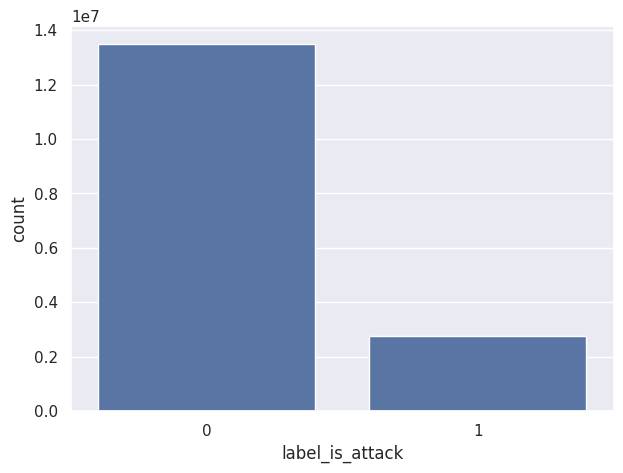

In [ ]:
# Check the counts of benign vs attack representation in the dataset
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='label_is_attack', data=final_data, order = final_data['label_is_attack'].value_counts().index, ax=ax)

In [ ]:
# Percentage of attack representations
df_is_attack = final_data.groupby('label_is_attack').agg({'label_is_attack':'first', 'label_is_attack':'count'}).rename_axis(None).sort_values('label_is_attack', ascending=False)
df_is_attack['percentage'] = df_is_attack / df_is_attack.loc[:'label_is_attack'].sum()
df_is_attack

,label_is_attack,percentage
0,13484708,0.8307
1,2748235,0.1693


In [ ]:
print(final_data['label'].value_counts().index)

CategoricalIndex(['Benign', 'DDOS attack-HOIC', 'DDoS attacks-LOIC-HTTP',
                  'DoS attacks-Hulk', 'Bot', 'FTP-BruteForce',
                  'SSH-Bruteforce', 'Infilteration',
                  'DoS attacks-SlowHTTPTest', 'DoS attacks-GoldenEye',
                  'DoS attacks-Slowloris', 'DDOS attack-LOIC-UDP',
                  'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'],
                 categories=['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS', ..., 'FTP-BruteForce', 'Infilteration', 'SQL Injection', 'SSH-Bruteforce'], ordered=False, dtype='category', name='label')


<ipython-input-40-ec6f11aa7621>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


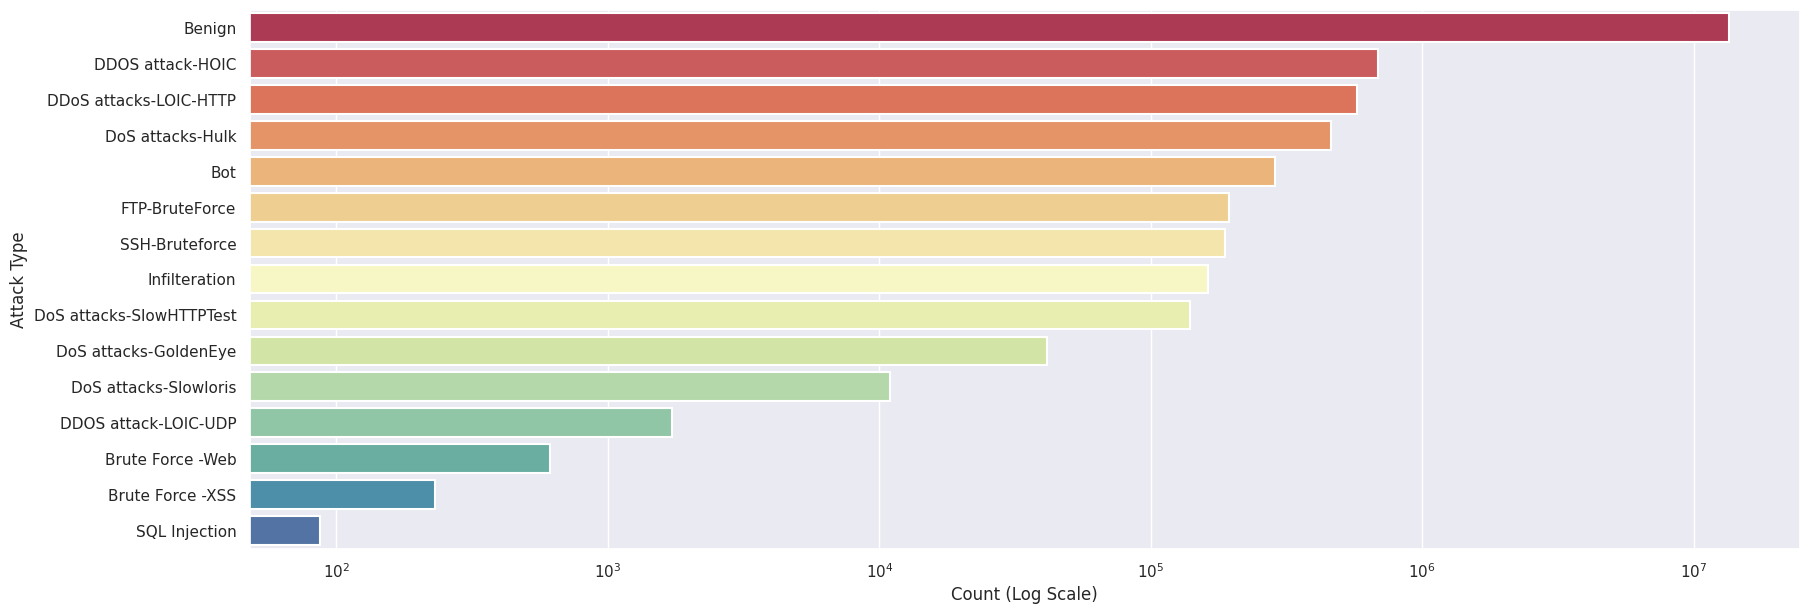

In [ ]:
# Attack distribution across the dataset

# Prepare value counts directly
attack_counts = final_data['label'].value_counts()

f, ax = plt.subplots(figsize=(20, 7))
ax.set_xscale('log', base=10)

sns.set_theme(style="whitegrid")
sns.set_context("talk")

sns.barplot(
    y=attack_counts.index,
    x=attack_counts.values,
    ax=ax,
    order=attack_counts.index,
    palette='Spectral'
)

plt.xlabel("Count (Log Scale)")
plt.ylabel("Attack Type")
plt.show()


In [ ]:
final_data.groupby('label').agg({'label':'first', 'label':'count'}).rename_axis(None).sort_values('label', ascending=False)

<ipython-input-41-03ae8f6e011b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_data.groupby('label').agg({'label':'first', 'label':'count'}).rename_axis(None).sort_values('label', ascending=False)


,label
Benign,13484708
DDOS attack-HOIC,686012
DDoS attacks-LOIC-HTTP,576191
DoS attacks-Hulk,461912
Bot,286191
FTP-BruteForce,193360
SSH-Bruteforce,187589
Infilteration,161934
DoS attacks-SlowHTTPTest,139890
DoS attacks-GoldenEye,41508


In [ ]:
# Correlation among features
corr = final_data.drop(columns=['label', 'timestamp']).corr()

<Axes: >

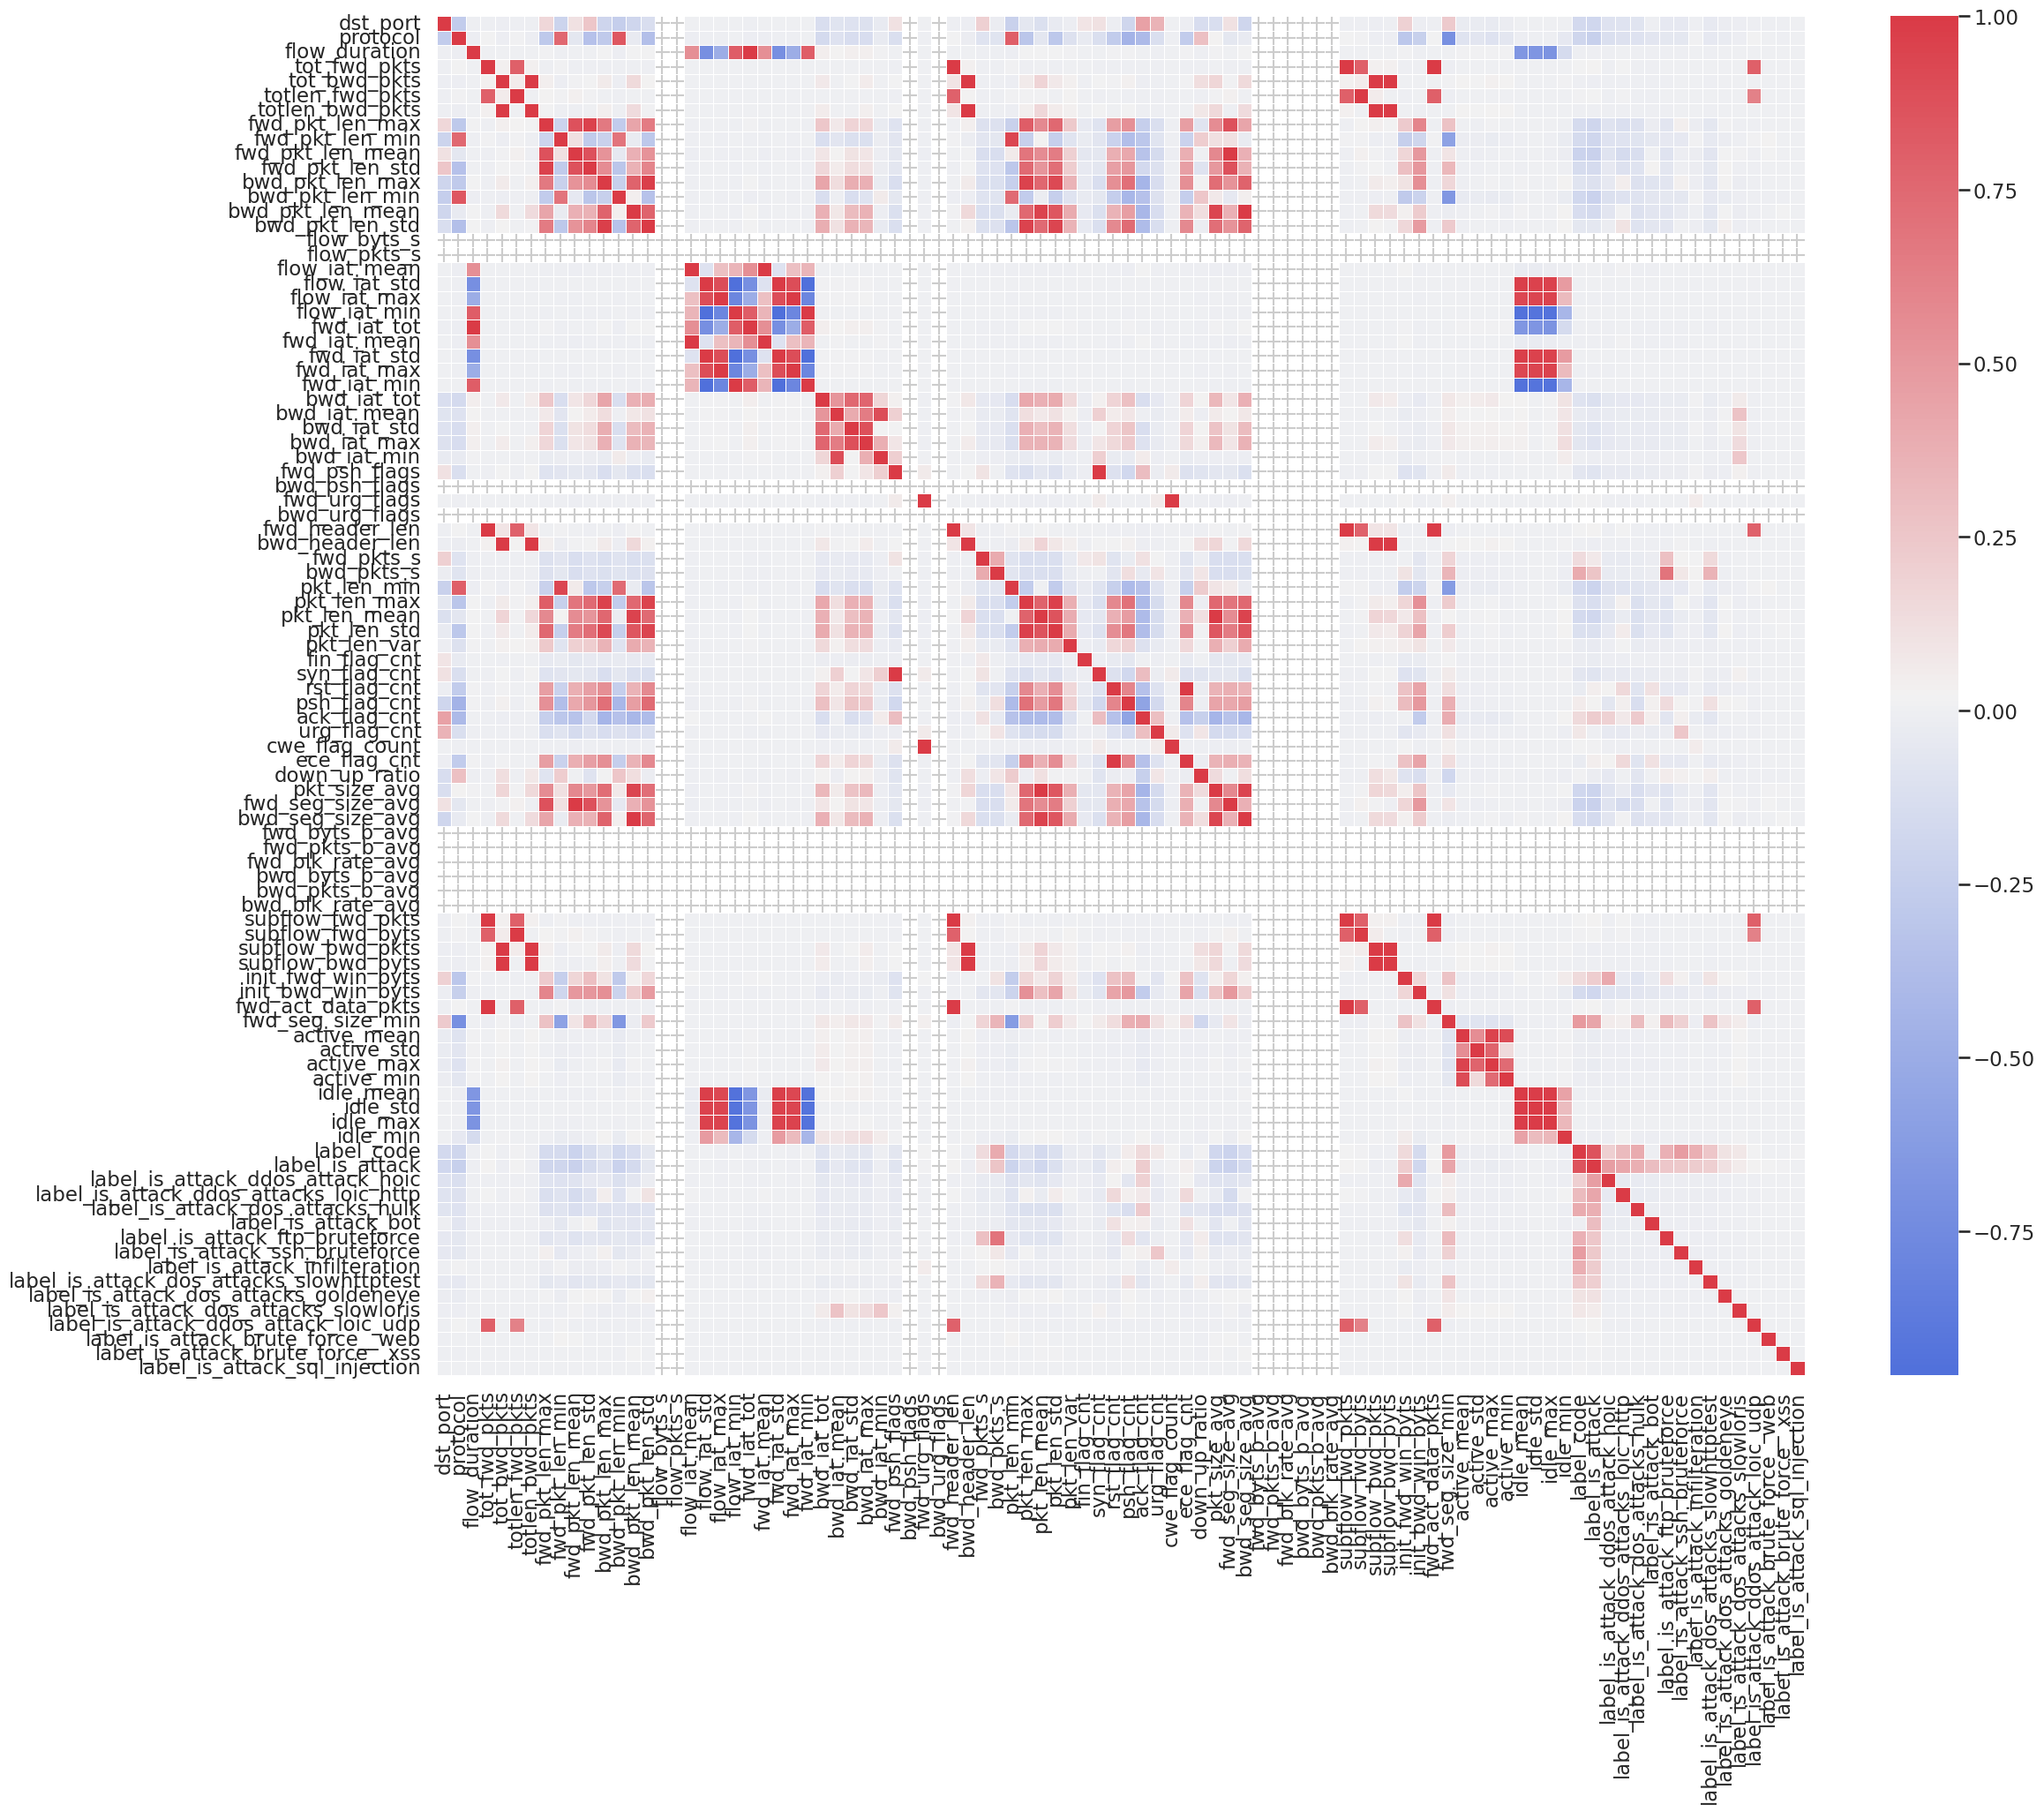

In [ ]:
plt.figure(figsize=(25, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True))


In [ ]:
# Check features with strong correlations
def get_abs_correlations(df, t):
    labels_to_drop = set()
    cols = df.columns.drop(['label', 'timestamp'])
    for i in range(0, df.shape[1]-2):
        for j in range(0, i+1):
            labels_to_drop.add((cols[i], cols[j]))

    c = corr.abs().unstack().drop(labels=labels_to_drop).sort_values(ascending=False)
    return c[c > t]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(get_abs_correlations(final_data, 0.8))

tot_bwd_pkts      subflow_bwd_pkts     1.000000
tot_fwd_pkts      subflow_fwd_pkts     1.000000
bwd_pkt_len_mean  bwd_seg_size_avg     1.000000
fwd_psh_flags     syn_flag_cnt         1.000000
totlen_fwd_pkts   subflow_fwd_byts     1.000000
fwd_urg_flags     cwe_flag_count       1.000000
fwd_pkt_len_mean  fwd_seg_size_avg     1.000000
totlen_bwd_pkts   subflow_bwd_byts     1.000000
flow_iat_min      fwd_iat_min          0.999996
flow_iat_max      fwd_iat_max          0.999994
rst_flag_cnt      ece_flag_cnt         0.999987
flow_duration     fwd_iat_tot          0.999986
flow_iat_std      fwd_iat_std          0.999981
flow_iat_mean     fwd_iat_mean         0.999963
tot_fwd_pkts      fwd_act_data_pkts    0.999189
subflow_fwd_pkts  fwd_act_data_pkts    0.999189
bwd_header_len    subflow_bwd_pkts     0.997798
tot_bwd_pkts      bwd_header_len       0.997798
bwd_header_len    subflow_bwd_byts     0.996040
totlen_bwd_pkts   bwd_header_len       0.996038
tot_fwd_pkts      fwd_header_len       0

In [ ]:
# Correlation of features with Binary Attack Type
corr_is_attack = corr.label_is_attack.filter(regex=r'^(?!label).*', axis=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(corr_is_attack[corr_is_attack.notnull()].sort_values(ascending=False)[:5])

fwd_seg_size_min     0.429296
bwd_pkts_s           0.260203
ack_flag_cnt         0.220465
init_fwd_win_byts    0.218390
fwd_pkts_s           0.071732
Name: label_is_attack, dtype: float64
